<a href="https://colab.research.google.com/github/hansbrunner/epidemiology-analysis/blob/main/Dengue_Malaria_Shigella_Sweden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
This Notebook explores the number of cases of
Shigella, Malaria, and Dengue fever in Sweden between 2020 and 2024.

The analysis utilizes data from Folkhälsomyndigheten
to visualize trends of these  diseases.

The notebook includes data cleaning, processing, and visualization using
the Pandas and Matplotlib libraries.""""

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filenames = ['shigellainfektion_fhm.csv', 'malaria_fhm.csv', 'denguefeber_fhm.csv']
names = ['Shigella', 'Malaria', 'Dengue']

# Empty list to store relevant data
data = []

for i, filename in enumerate(filenames):

    # Read the first row to get the existing column names
    existing_columns = pd.read_csv(filename, nrows=1).columns.tolist()

    # Define names for the last two unnamed columns - hardcoded
    unnamed_column_names = [' "2024(tot)', ' "2024(inc/100.000)"']

    # Combine columns
    all_column_names = existing_columns + unnamed_column_names

    # Read CSV using the combined column names
    df = pd.read_csv(filename, names=all_column_names, header=0)

    # Append to data
    data.append(df.iloc[-1,:])

final_df = pd.DataFrame(data)

# Add a new column with the disease names
final_df['Disease'] = names


In [29]:
import re

# Columns are poorly defined
# Function to clean and rename columns
def clean_column_name(col_name):
    match = re.search(r'(\d{4})', col_name)  # Extract the year
    if match:
        year = match.group(1)
        if 'inc' in col_name.lower():
            return f'{year}_norm'
        else:
            return year
    else:
        return col_name  # Keep original name if no year found

# Rename columns
final_df.rename(columns=clean_column_name, inplace=True)

# Print the DataFrame with renamed columns
print(final_df)


   Landsting   1997  1997_norm  1998  1998_norm  1999  1999_norm  2000  \
21    Totalt    631       7.13   584       6.60   468       5.28   493   
21    Totalt    228       2.58   208       2.35   163       1.84   153   
21    Totalt      0       0.00     0       0.00     0       0.00     0   

    2000_norm  2001  ...  2020_norm  2021  2021_norm  2022  2022_norm  2023  \
21       5.55   540  ...       1.55   187       1.79   434       4.12   728   
21       1.72   150  ...       1.33   145       1.39   157       1.49   145   
21       0.00     0  ...       0.56    12       0.11    50       0.48   150   

    2023_norm  2024  2024_norm   Disease  
21       6.90   631       5.98  Shigella  
21       1.37    84       0.80   Malaria  
21       1.42   187       1.77    Dengue  

[3 rows x 58 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

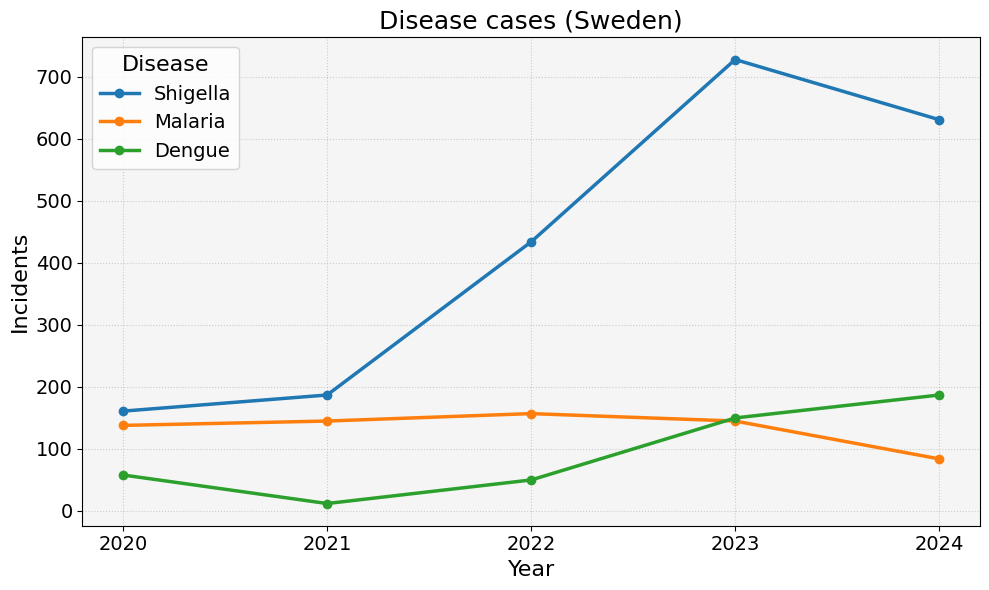

In [36]:
from google.colab import files

# Plot disease trends

plot_df = final_df.set_index('Disease')

# Select data to plot
years = ['2020', '2021', '2022', '2023', '2024']
df_plot = plot_df[years].T

# # Create the plot
df_plot.plot(marker='o', figsize=(10, 6), linewidth=2.5, linestyle='-')

# # Customize the plot
plt.title('Disease cases (Sweden)', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Incidents', fontsize=16)
plt.legend(title='Disease', fontsize=14, title_fontsize=16)
plt.xticks(np.arange(5), fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle=':', alpha=0.6)
plt.gca().set_facecolor('#f5f5f5') # Background
plt.tight_layout()

# Save
#plt.savefig('virus_cases_plot.png', dpi=300)
#files.download('virus_cases_plot.png')

# Show the plot
plt.show()